In [32]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Load the California housing data
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
df['MedHouseVal'] = cal_housing.target


Text(0, 0.5, 'Latitude')

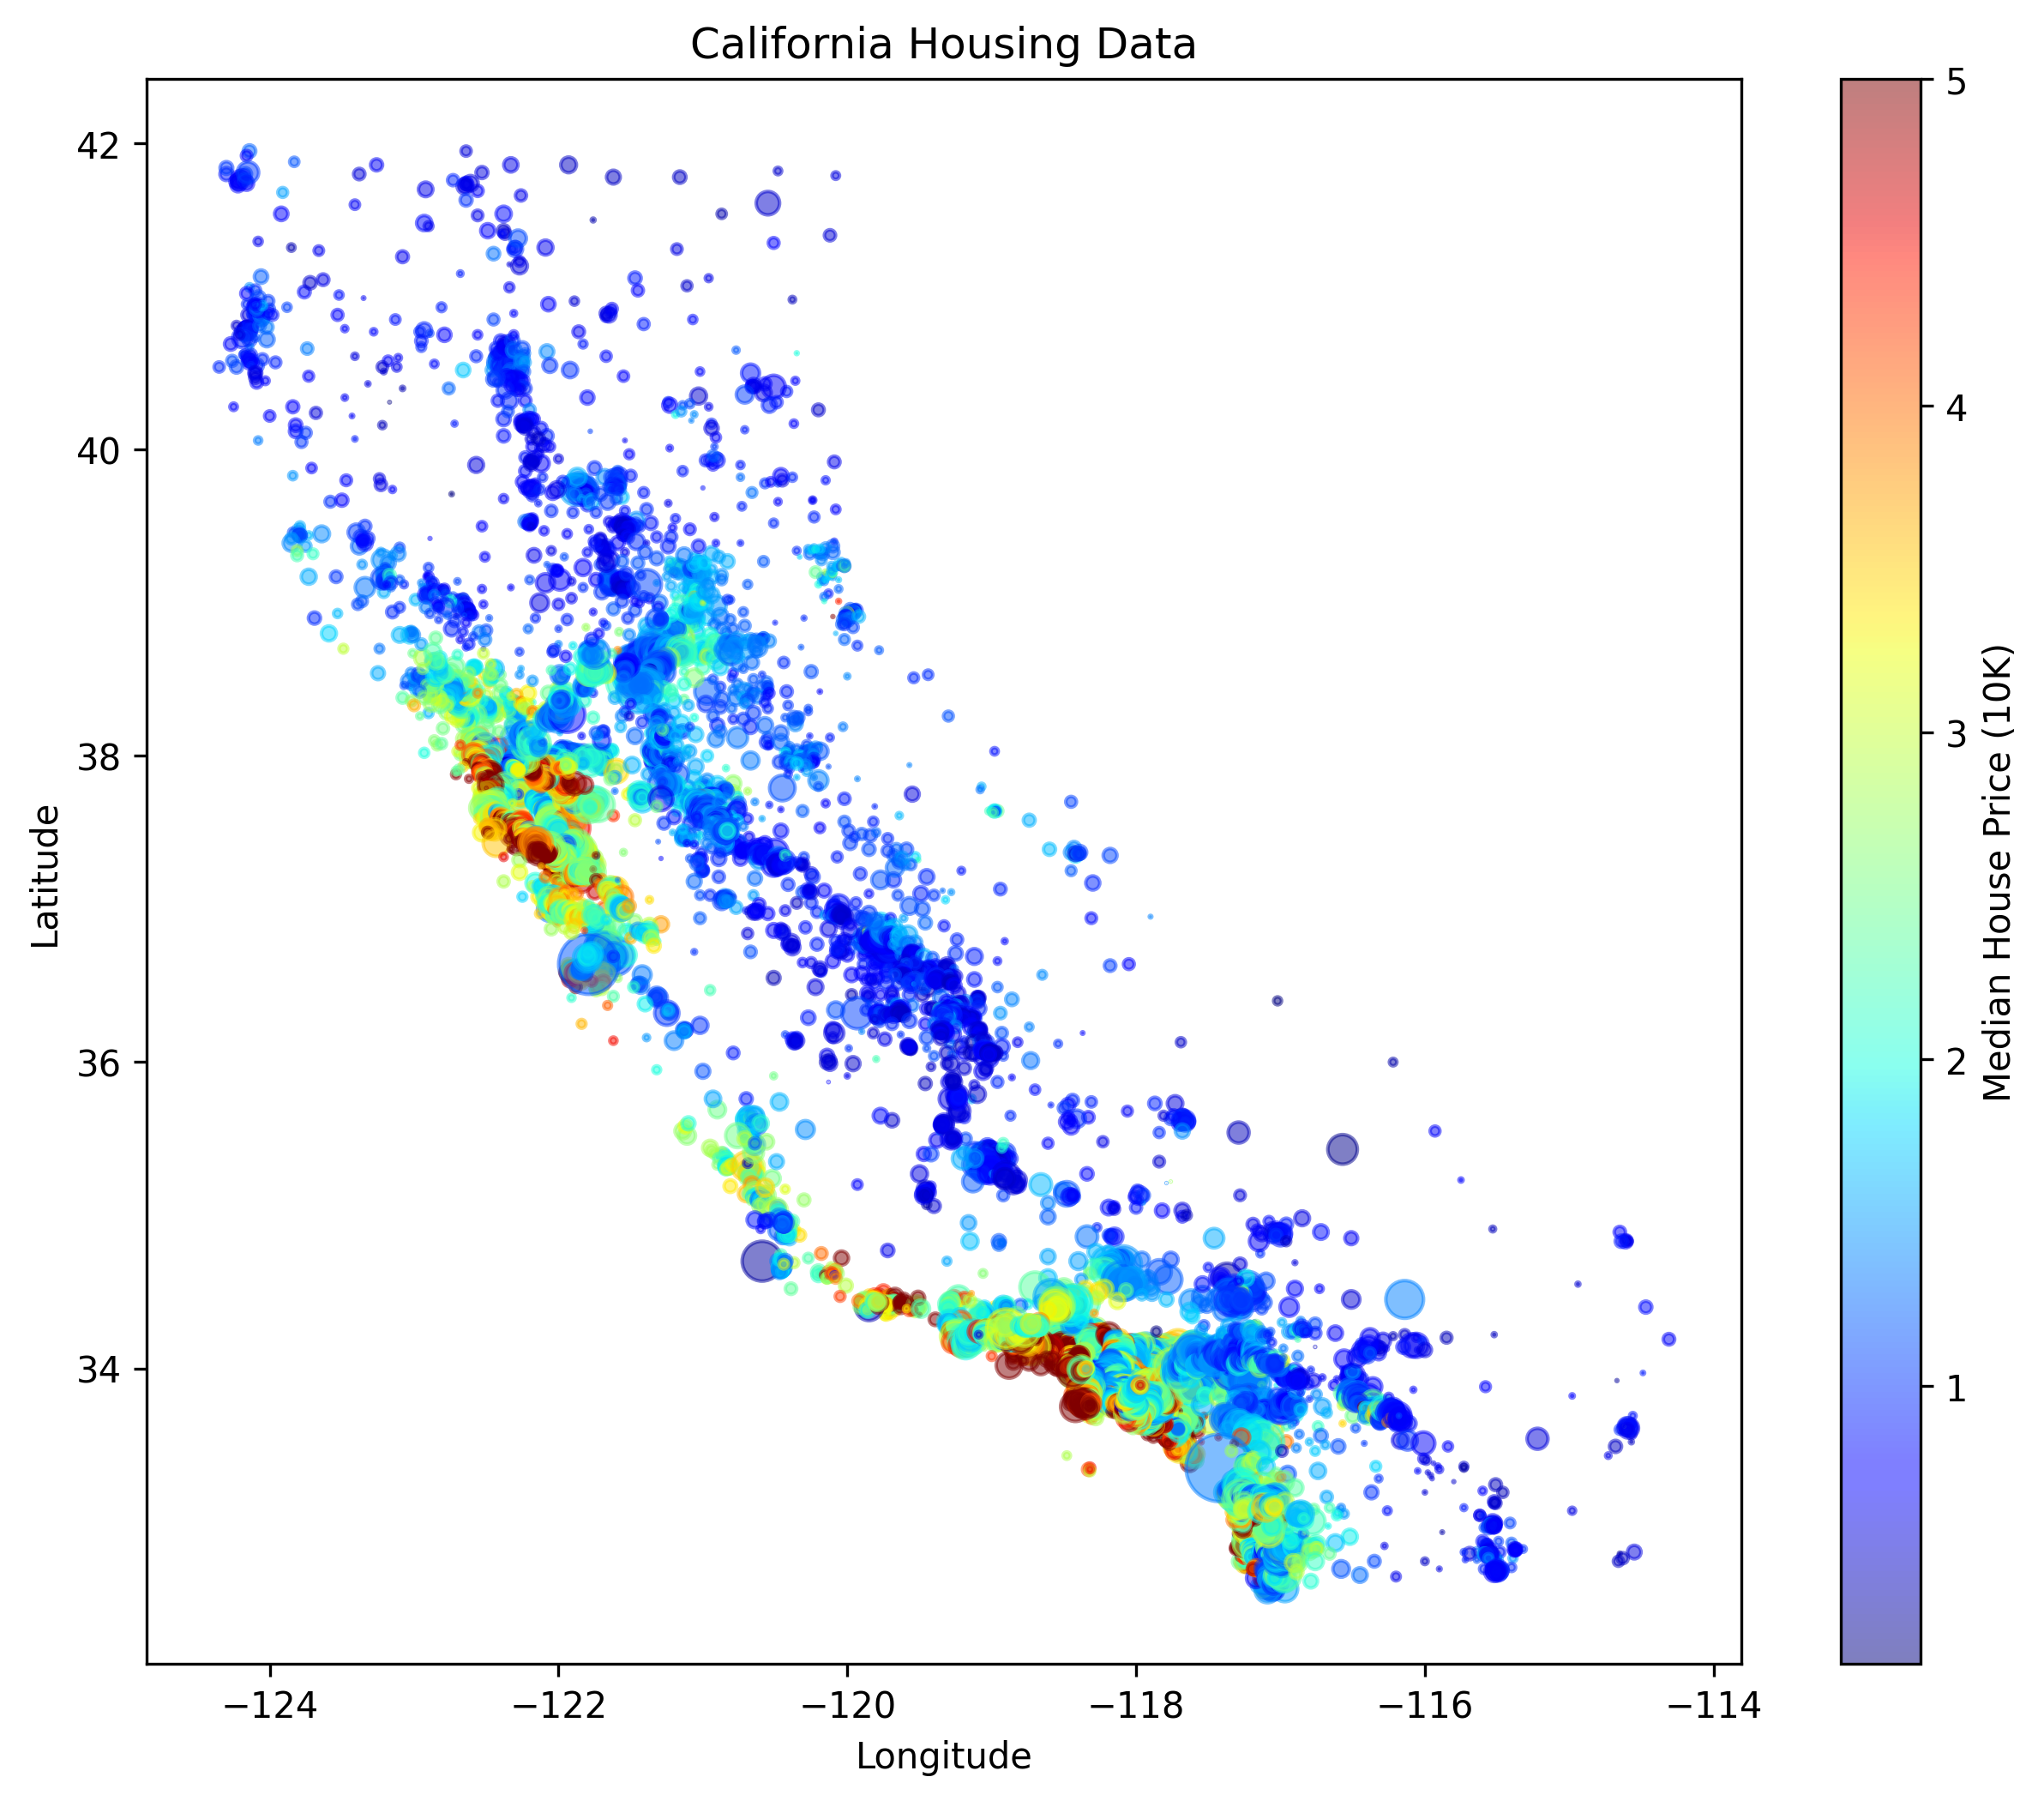

In [33]:
plt.figure(figsize=(10,8), dpi=300)

plt.scatter(x=df['Longitude'], y=df['Latitude'], c=df['MedHouseVal'], cmap='jet', s=df['Population']/100, alpha=0.5)

plt.colorbar(label='Median House Price (10K)')

plt.title('California Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


In [41]:
import numpy as np

In [46]:

# Create a scatter plot with hover boxes, map background, and color based on target
fig = go.Figure(go.Scattermapbox(
    lat=df['Latitude'],
    lon=df['Longitude'],
    mode='markers',
    hoverinfo='text',
    hovertext=df.apply(lambda row: f"Median House Price: ${row['MedHouseVal']:,.2f}<br>Median Income: ${row['MedInc']:.2f}<br>Median Age: {row['HouseAge']:.2f}<br>Ave Rooms: {row['AveRooms']:.2f}<br>Ave Bedrooms: {row['AveBedrms']:.2f}<br>Population: {row['Population']:,.2f}<br>Ave Occupancy: {row['AveOccup']:.2f}", axis=1),
    marker=go.scattermapbox.Marker(
        color=df['MedHouseVal'],
        colorscale='Viridis',
        size=df['Population']/200, #np.log(df['Population'])
        colorbar=dict(
            title='Median House Price'
        )
    )
))

# Update the layout to display a map
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=6,
    mapbox_center_lat=37.7749,  # California's latitude
    mapbox_center_lon=-122.4194,  # California's longitude
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

# Show the plot
fig.show()